In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
df=pd.read_csv('used_cars_data.csv')

In [505]:
df.shape

(7253, 14)

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [507]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [508]:
pd.isnull(df).sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [509]:
df1=df.dropna(subset=['Mileage','Engine','Power','Seats','Price'])

In [510]:
df1.shape

(5975, 14)

In [511]:
df2=df1.drop('New_Price',axis=1)

In [512]:
pd.isnull(df2).sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [513]:
l=[]
for i in df2['Mileage']:
    x=list(i.split(" "))
    l.append(float(x[0]))
df2['Mileage']=l

In [514]:
l=[]
for i in df2['Engine']:
    x=list(i.split(" "))
    l.append(int(x[0]))
df2['Engine']=l

In [515]:
df2 = df2.drop(df2[df2['Power'] == 'null bhp'].index)

In [516]:
l=[]
for i in df2['Power']:
    x=list(i.split(" "))
    l.append(float(x[0]))
df2['Power']=l

In [517]:
df2.rename(columns={'Engine':'Engine(CC)','Kilometers_Driven':'Km_Driven','Power':'Power(bhp)'},inplace=True)

In [518]:
df2.head()

,S.No.,Name,Location,Year,Km_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [519]:
df2.describe()

,S.No.,Year,Km_Driven,Mileage,Engine(CC),Power(bhp),Seats,Price
count,5872.000000,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,3013.288147,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,1737.351187,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,0.000000,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,1509.750000,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,3015.500000,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,4516.250000,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [520]:
df2.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Km_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine(CC)', 'Power(bhp)',
       'Seats', 'Price'],
      dtype='object')

## Exploratory Data Analysis

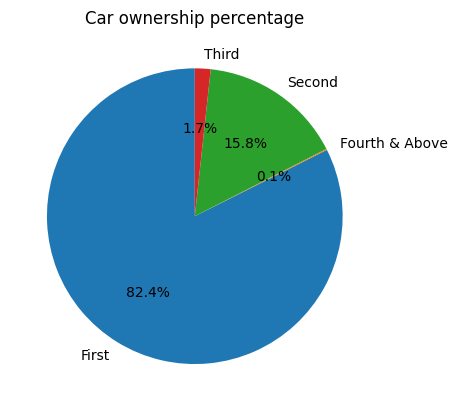

In [539]:
owners = df2.groupby('Owner_Type')['S.No.'].count()
plt.pie(owners, labels=owners.index, autopct='%1.1f%%', startangle=90)
plt.title('Car ownership percentage')
plt.show()

_As per above chart we can see that maximum percent of owners are first hand owners._

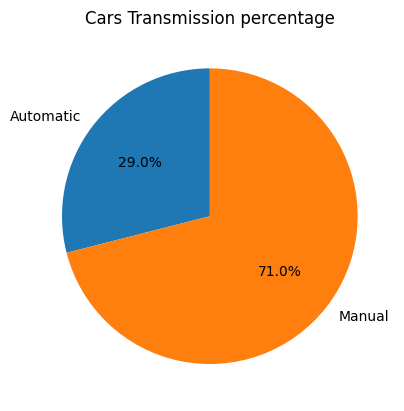

In [538]:
owners = df2.groupby('Transmission')['S.No.'].count()
plt.pie(owners, labels=owners.index, autopct='%1.1f%%', startangle=90)
plt.title('Cars Transmission percentage')
plt.show()

_From the above chart we can say 71.4% of cars are of manual transmission and rest 28.6% are Automatic._

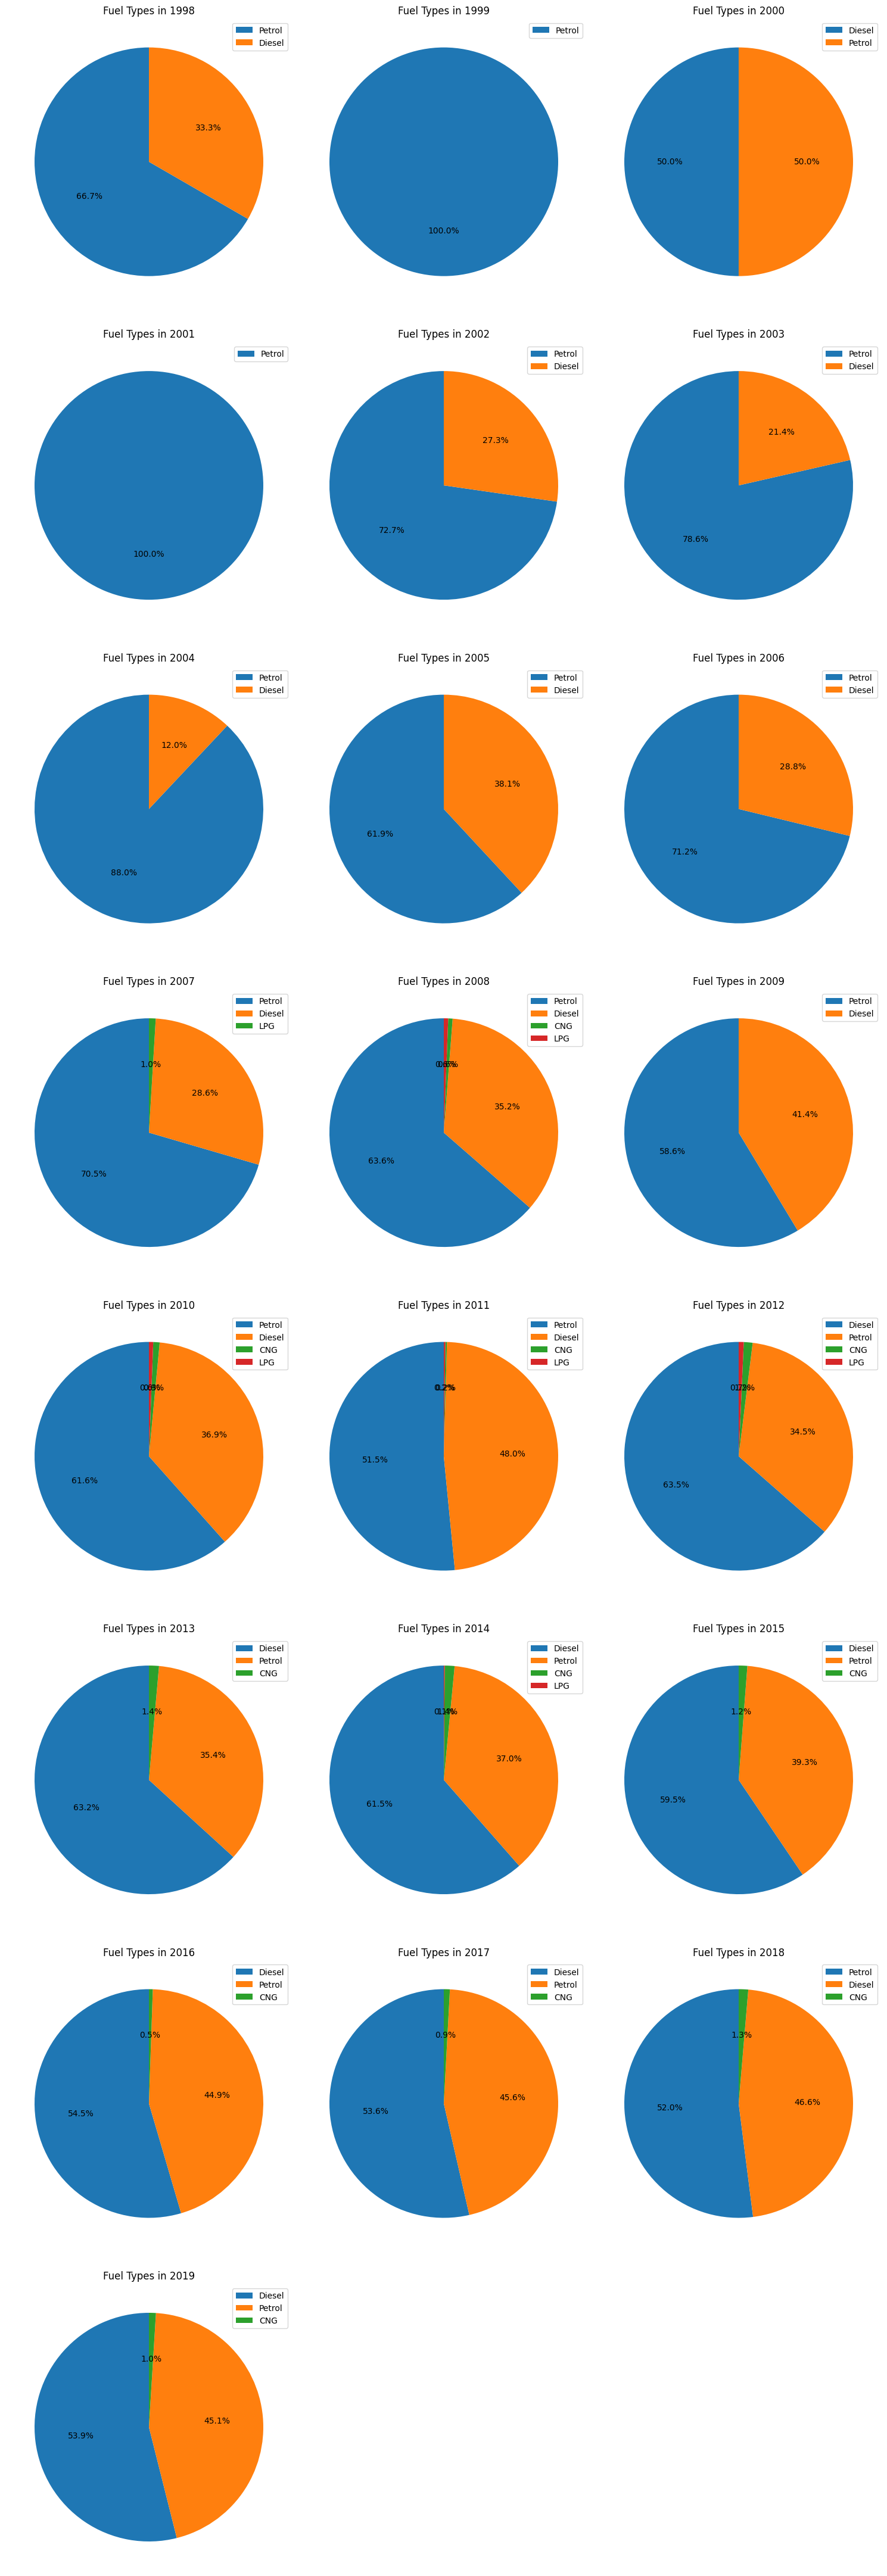

In [537]:
def plot_fuel_distribution(df):
    years = sorted(list(df['Year'].unique()))
    n = len(years)
    fig = plt.figure(figsize=(15, 60))
    for idx, year in enumerate(years, 1):
        year_data = df[df['Year'] == year]
        fuel_counts = year_data['Fuel_Type'].value_counts()
        plt.subplot(((n+1)//2), 3, idx)
        plt.pie(fuel_counts.values, autopct='%1.1f%%', startangle=90)
        plt.legend(fuel_counts.index)
        plt.title(f'Fuel Types in {year}')
    plt.tight_layout()
    return fig
fig = plot_fuel_distribution(df2)
plt.show()

_The above charts shows the the percent of cars of different fuel type in diffrent year._

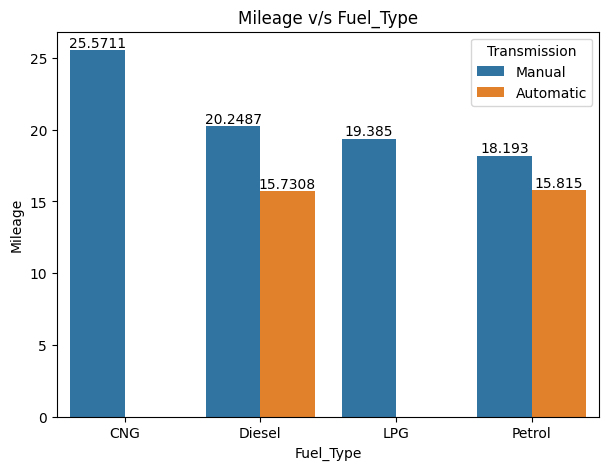

In [530]:
fuel_type_trans_mileage=df2.groupby(['Fuel_Type','Transmission'],as_index=False)['Mileage'].mean().sort_values(by='Mileage',ascending=False)
plt.figure(figsize=(7,5))
ax=sns.barplot(x='Fuel_Type',y='Mileage',data=fuel_type_trans_mileage,hue='Transmission')
plt.title('Mileage v/s Fuel_Type')
for bars in ax.containers:
    ax.bar_label(bars)

_As per above graph we can see the comparison between Vehicle Fuel type and its Mileage._

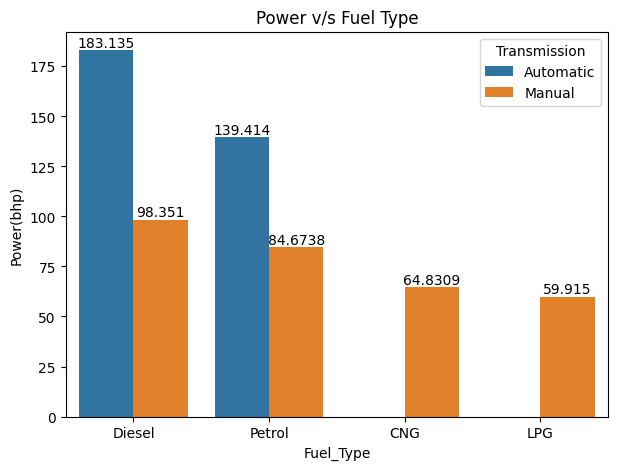

In [529]:
fuel_type_trans_power=df2.groupby(['Fuel_Type','Transmission'],as_index=False)['Power(bhp)'].mean().sort_values(by='Power(bhp)',ascending=False)
plt.figure(figsize=(7,5))
ax=sns.barplot(x='Fuel_Type',y='Power(bhp)',data=fuel_type_trans_power,hue='Transmission')
plt.title('Power v/s Fuel Type')
for bars in ax.containers:
    ax.bar_label(bars)

_As per above graph we can see the comparison between Vehicle Fuel type and its Power._

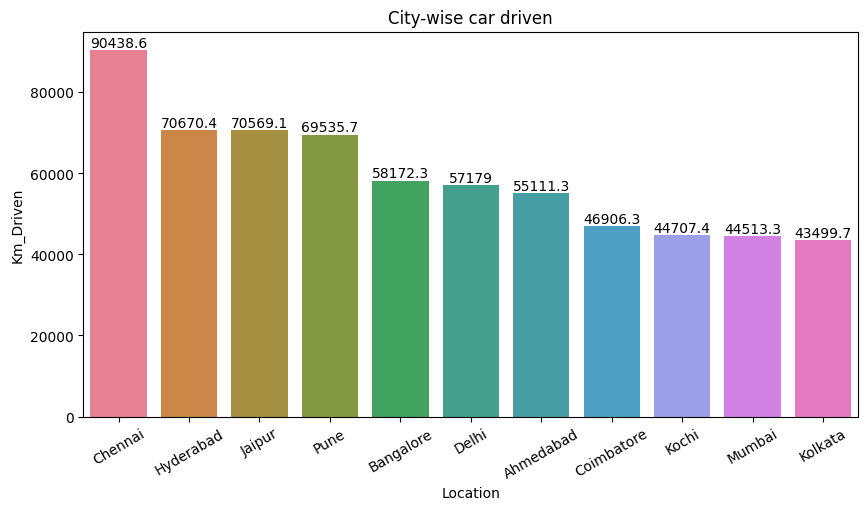

In [528]:
city_usage=df2.groupby(['Location'],as_index=False)['Km_Driven'].mean().sort_values(by='Km_Driven',ascending=False)
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Location',y='Km_Driven',data=city_usage,hue='Location')
plt.xticks(rotation=30)
plt.title('City-wise car driven')
for bars in ax.containers:
    ax.bar_label(bars)

_As per above graph the cars are driven most in Chennai and least in Kolkata._

C:\Users\Hp\AppData\Local\Temp\ipykernel_21416\2999834057.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(index, bottom[j] + value / 2, f'{value:.1f}%', ha='center', va='center', color='white')


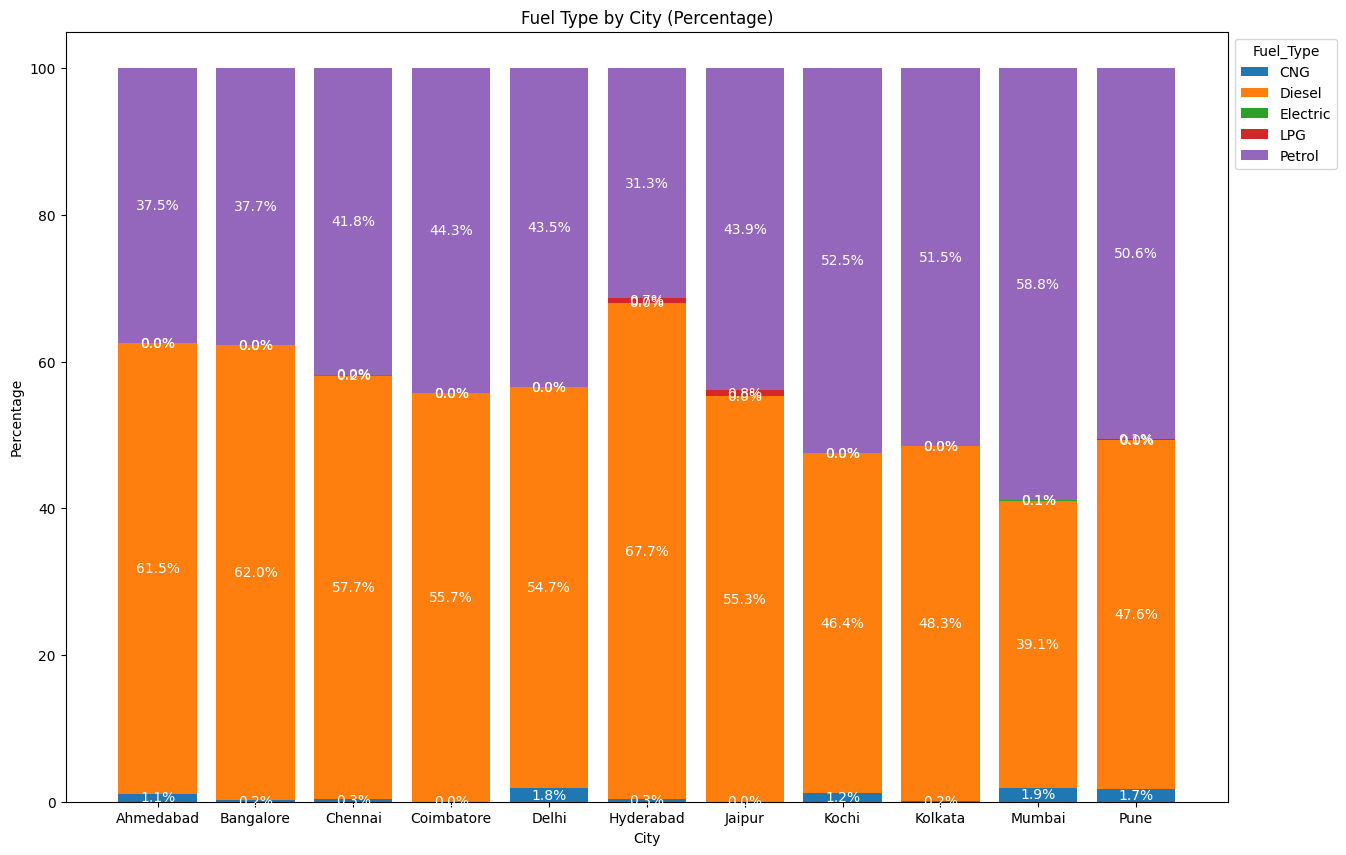

In [527]:
city_cars = df.groupby(['Location', 'Fuel_Type']).size().unstack(fill_value=0)
city_car_percent = city_cars.div(city_cars.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(15, 10))
bottom = np.zeros(len(city_car_percent))

for i, type_status in enumerate(city_car_percent.columns):
    ax.bar(city_car_percent.index, city_car_percent[type_status], bottom=bottom, label=type_status)
    for j, (index, value) in enumerate(city_car_percent[type_status].items()):
        ax.text(index, bottom[j] + value / 2, f'{value:.1f}%', ha='center', va='center', color='white')
    bottom += city_car_percent[type_status]

ax.set_title('Fuel Type by City (Percentage)')
ax.set_xlabel('City')
ax.set_ylabel('Percentage')
ax.legend(title='Fuel_Type', bbox_to_anchor = (1.0, 1.0))
plt.show()

_From above graph we can see the cars ditribution in each city as per fuel type._